# 7. Contours  

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

## Steps:

1. Image to grayscale
2. blurr image to reduce high frequency noise to make the contour detection proccess more accurate.
3. Apply threshold (binarization of the image). Typically edge detection and thresholding are used in this process.

In [65]:
image = cv2.imread('../imgs/shapes_and_colors.jpg')
image_original = image.copy()
image_copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

Text(0.5, 1.0, 'Thresh')

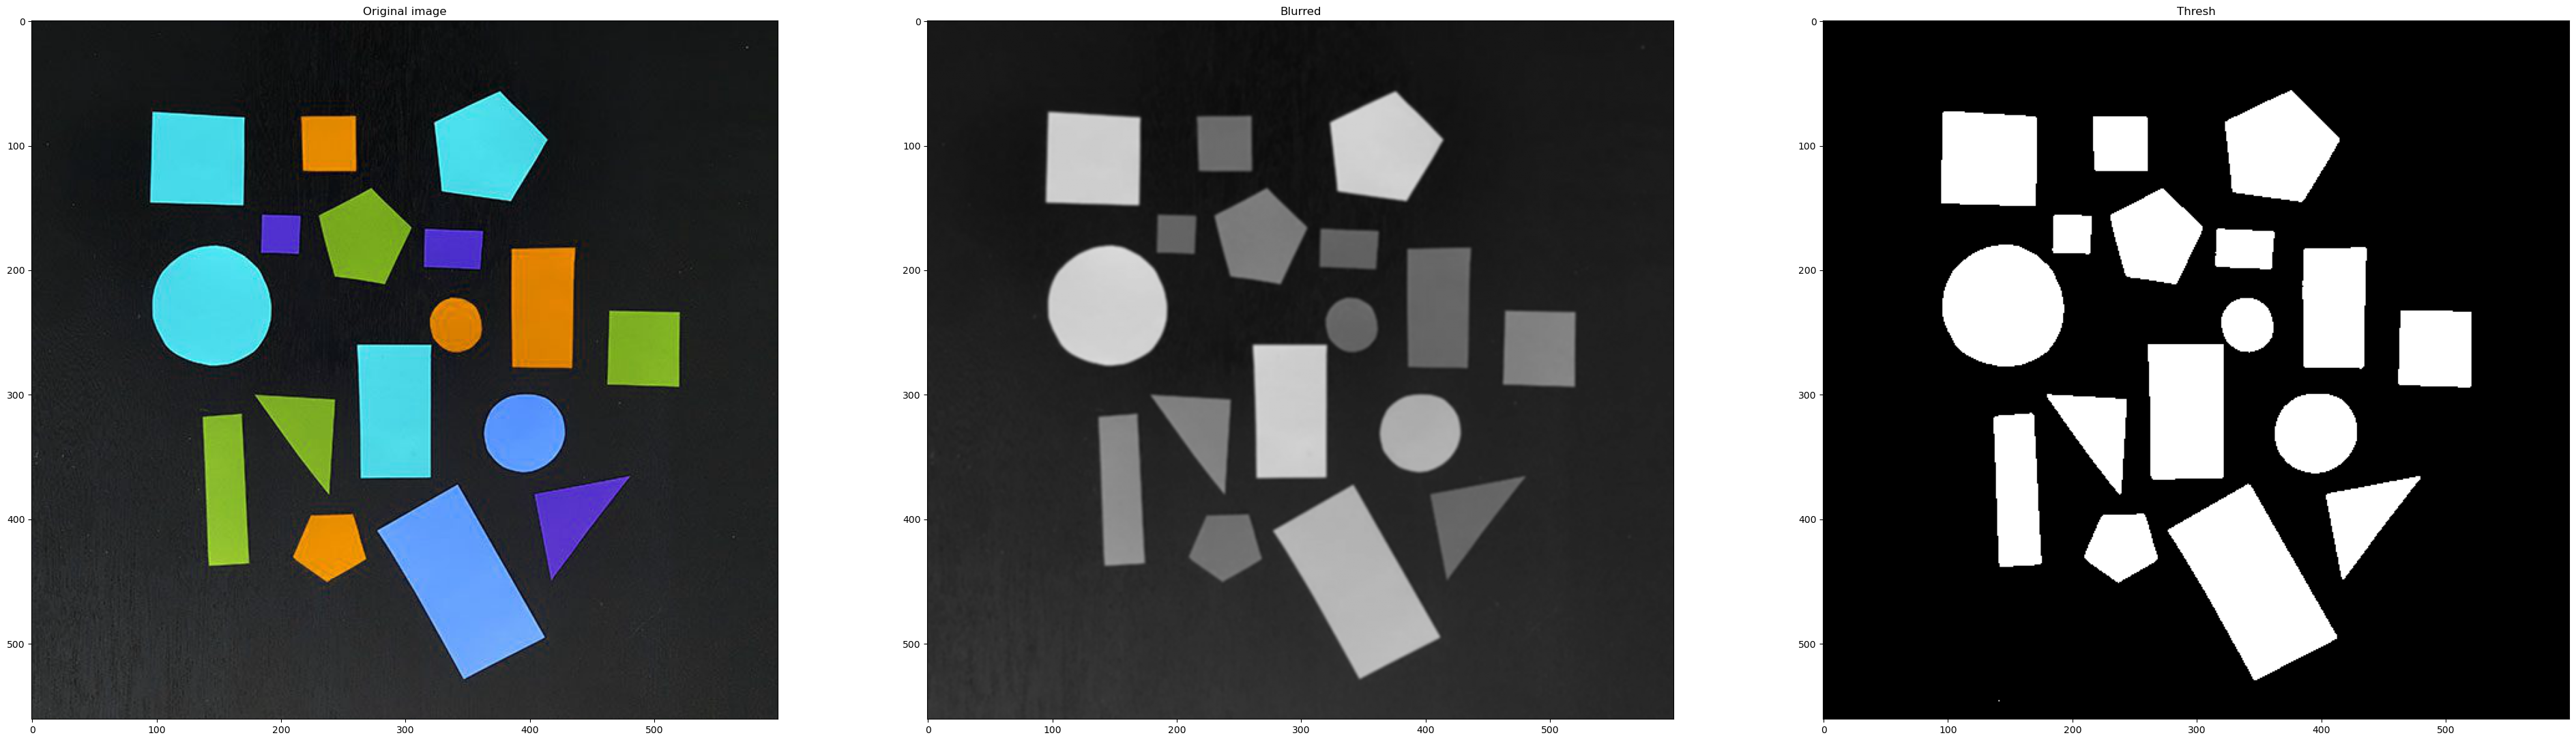

In [66]:
# show thresholded image
fig, axes = plt.subplots(1, 3, figsize=(48, 24))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original image')
axes[1].imshow(blurred, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Blurred')
axes[2].imshow(thresh, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Thresh')

Once the image is *binarized*, the shapes are represented as a white foreground on a black background.

Next step is to find the location of these white regions using contour detection:

**_note:_** `findContours` is performed in a copy of the thresholded image. 

Text(0.5, 1.0, 'Original image contoured')

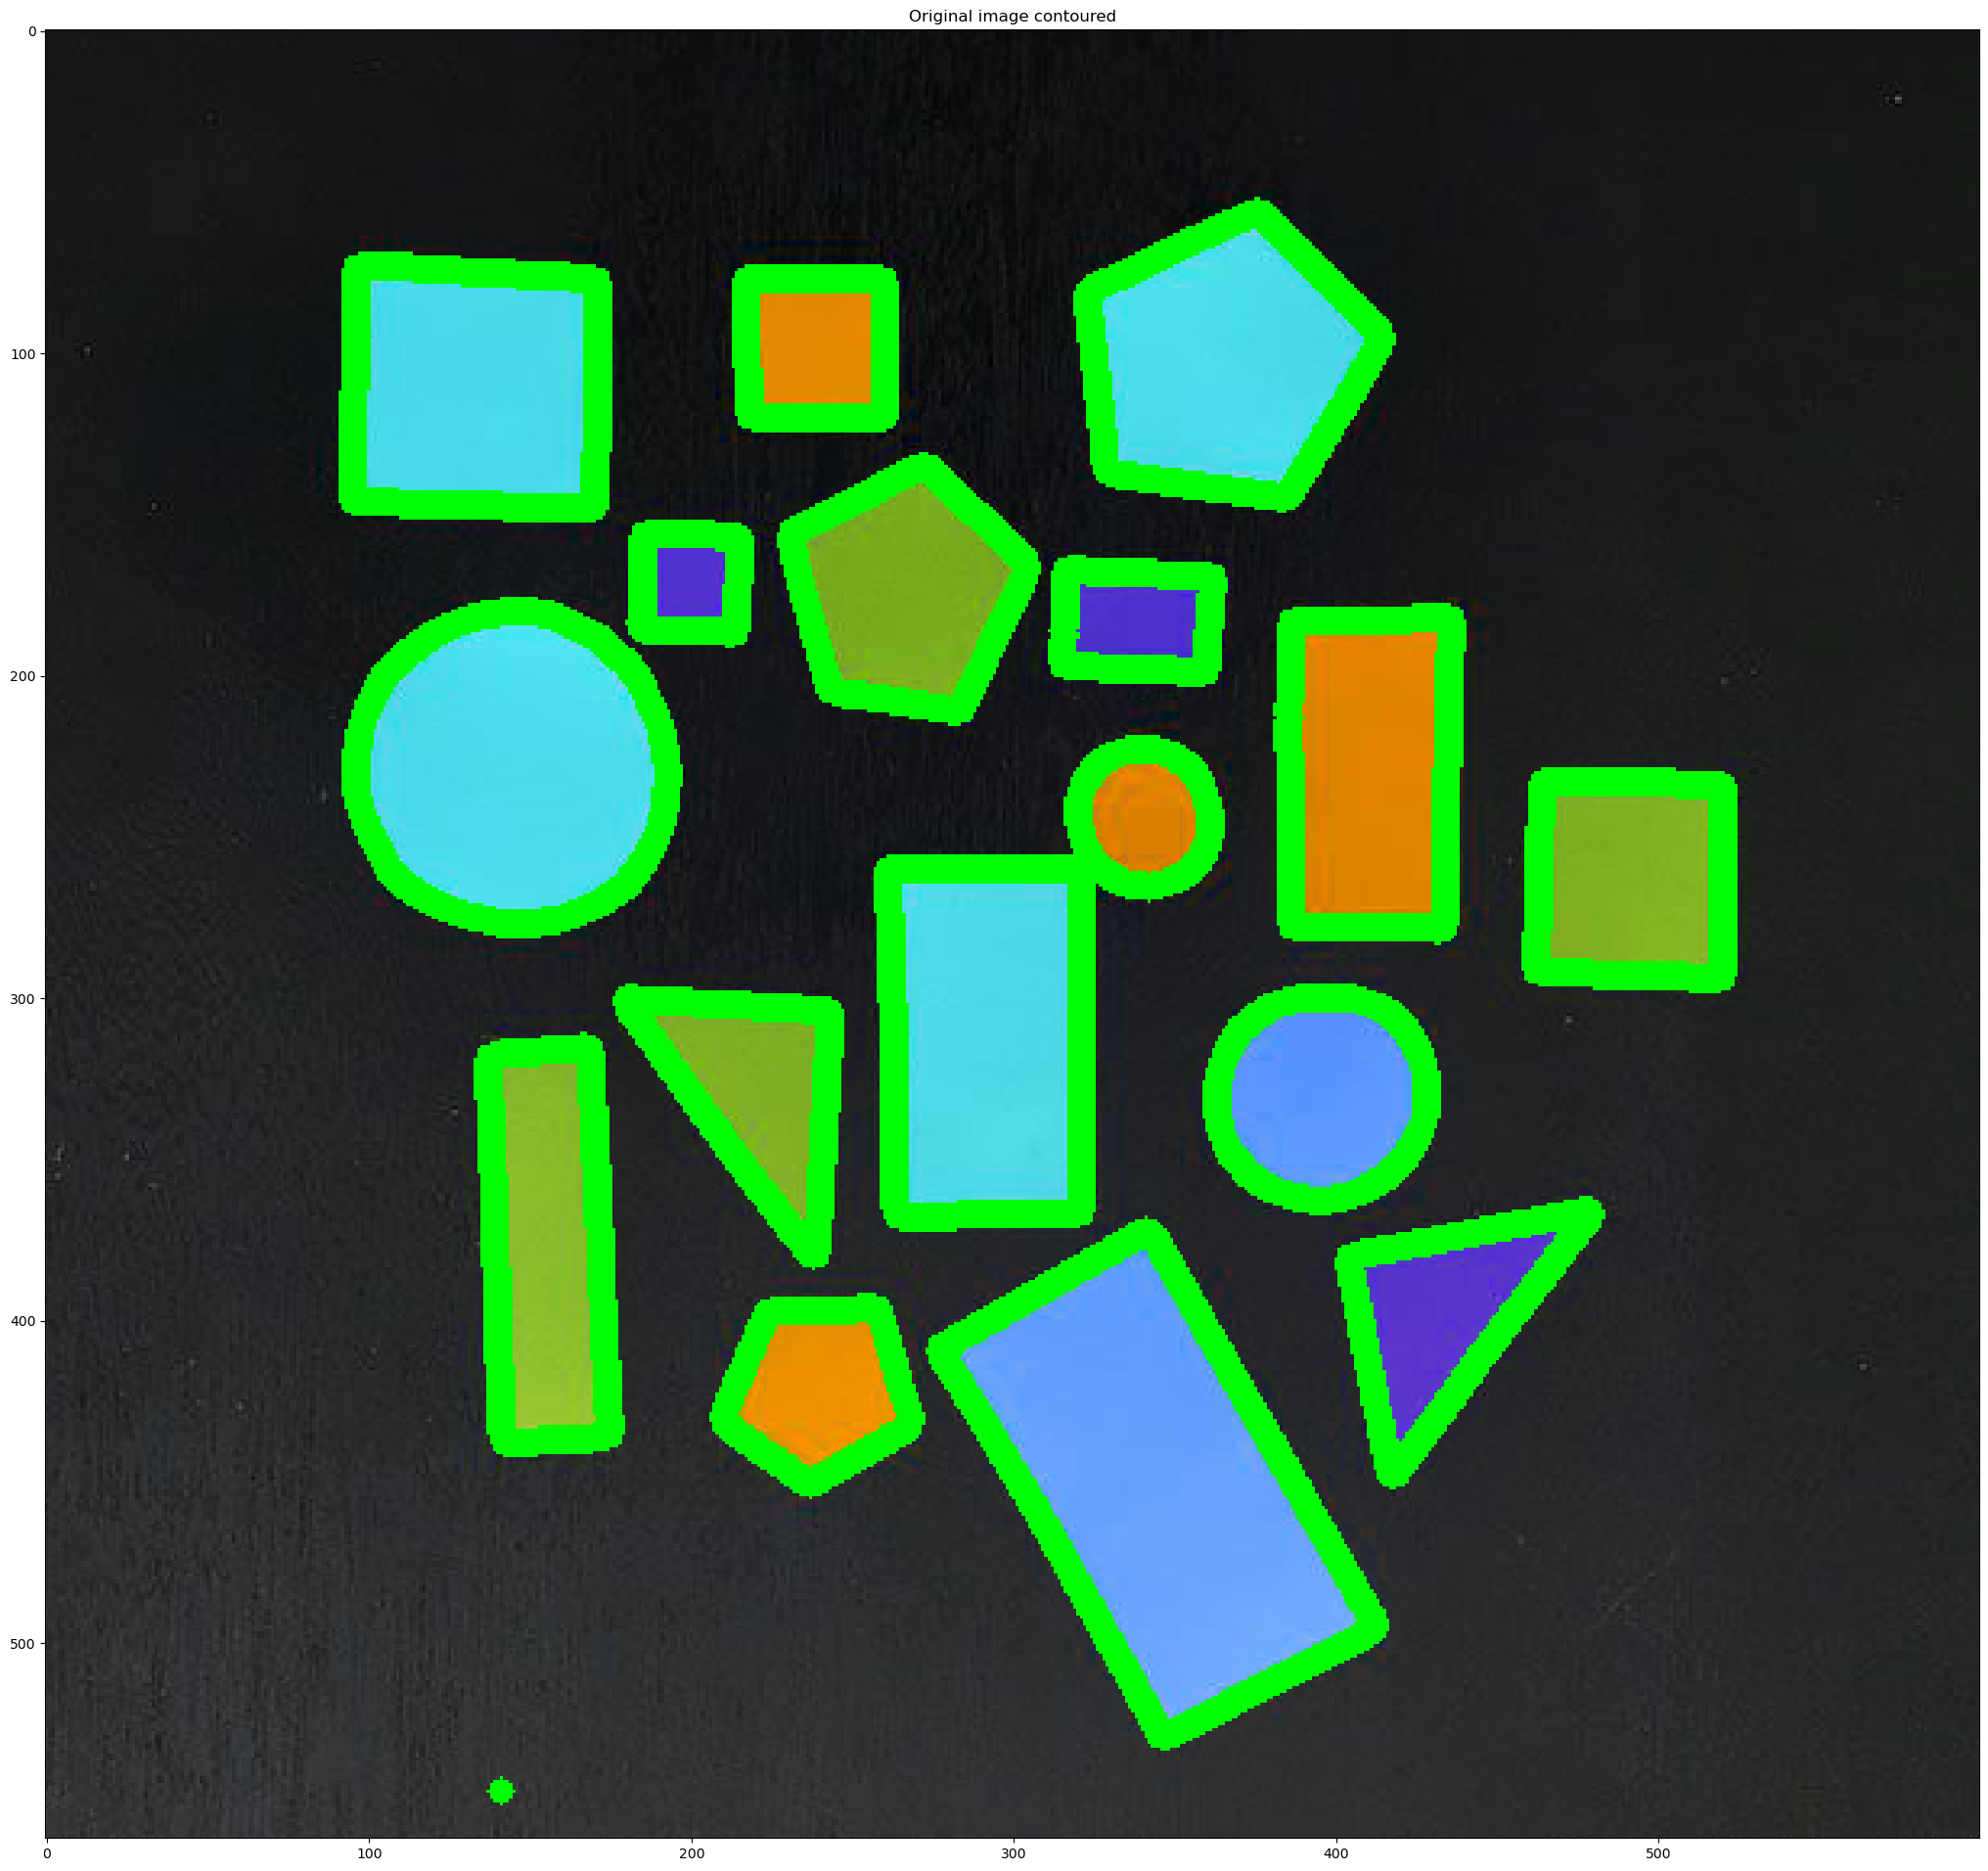

In [67]:
# Find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Grab the appropriate tuple value based on whether 
# we are using OpenCV 2.4, 3, or 4.
cnts = imutils.grab_contours(cnts)

# (image,contours,number of contours (-1 = all),color to draw, width (-1 =filled)
cv2.drawContours(image, cnts, -1, (0, 255, 0), 8)
cv2.resize(image, (1000, 1000))
# show thresholded image
fig, axes = plt.subplots(1, 1, figsize=(48, 24))
axes.imshow(image, cmap='gray', vmin=0, vmax=255)
axes.set_title('Original image contoured')



As it is visible, there is one contour in the bottom left. So now we want to eliminate it. 

For this task, we will use the area to determine wether the contour is big/small enough to be a polygon.

First, we print all the contours area to determine the average area and find the small contour area.

0.0
2207.0
10452.5
2707.5
3921.0
3282.5
2561.5
6277.0
3397.5
1387.0
4641.5
7405.0
1339.5
882.5
3746.5
1832.5
5448.0
5603.5
Number of contours found:  17


Text(0.5, 1.0, 'Original image contoured')

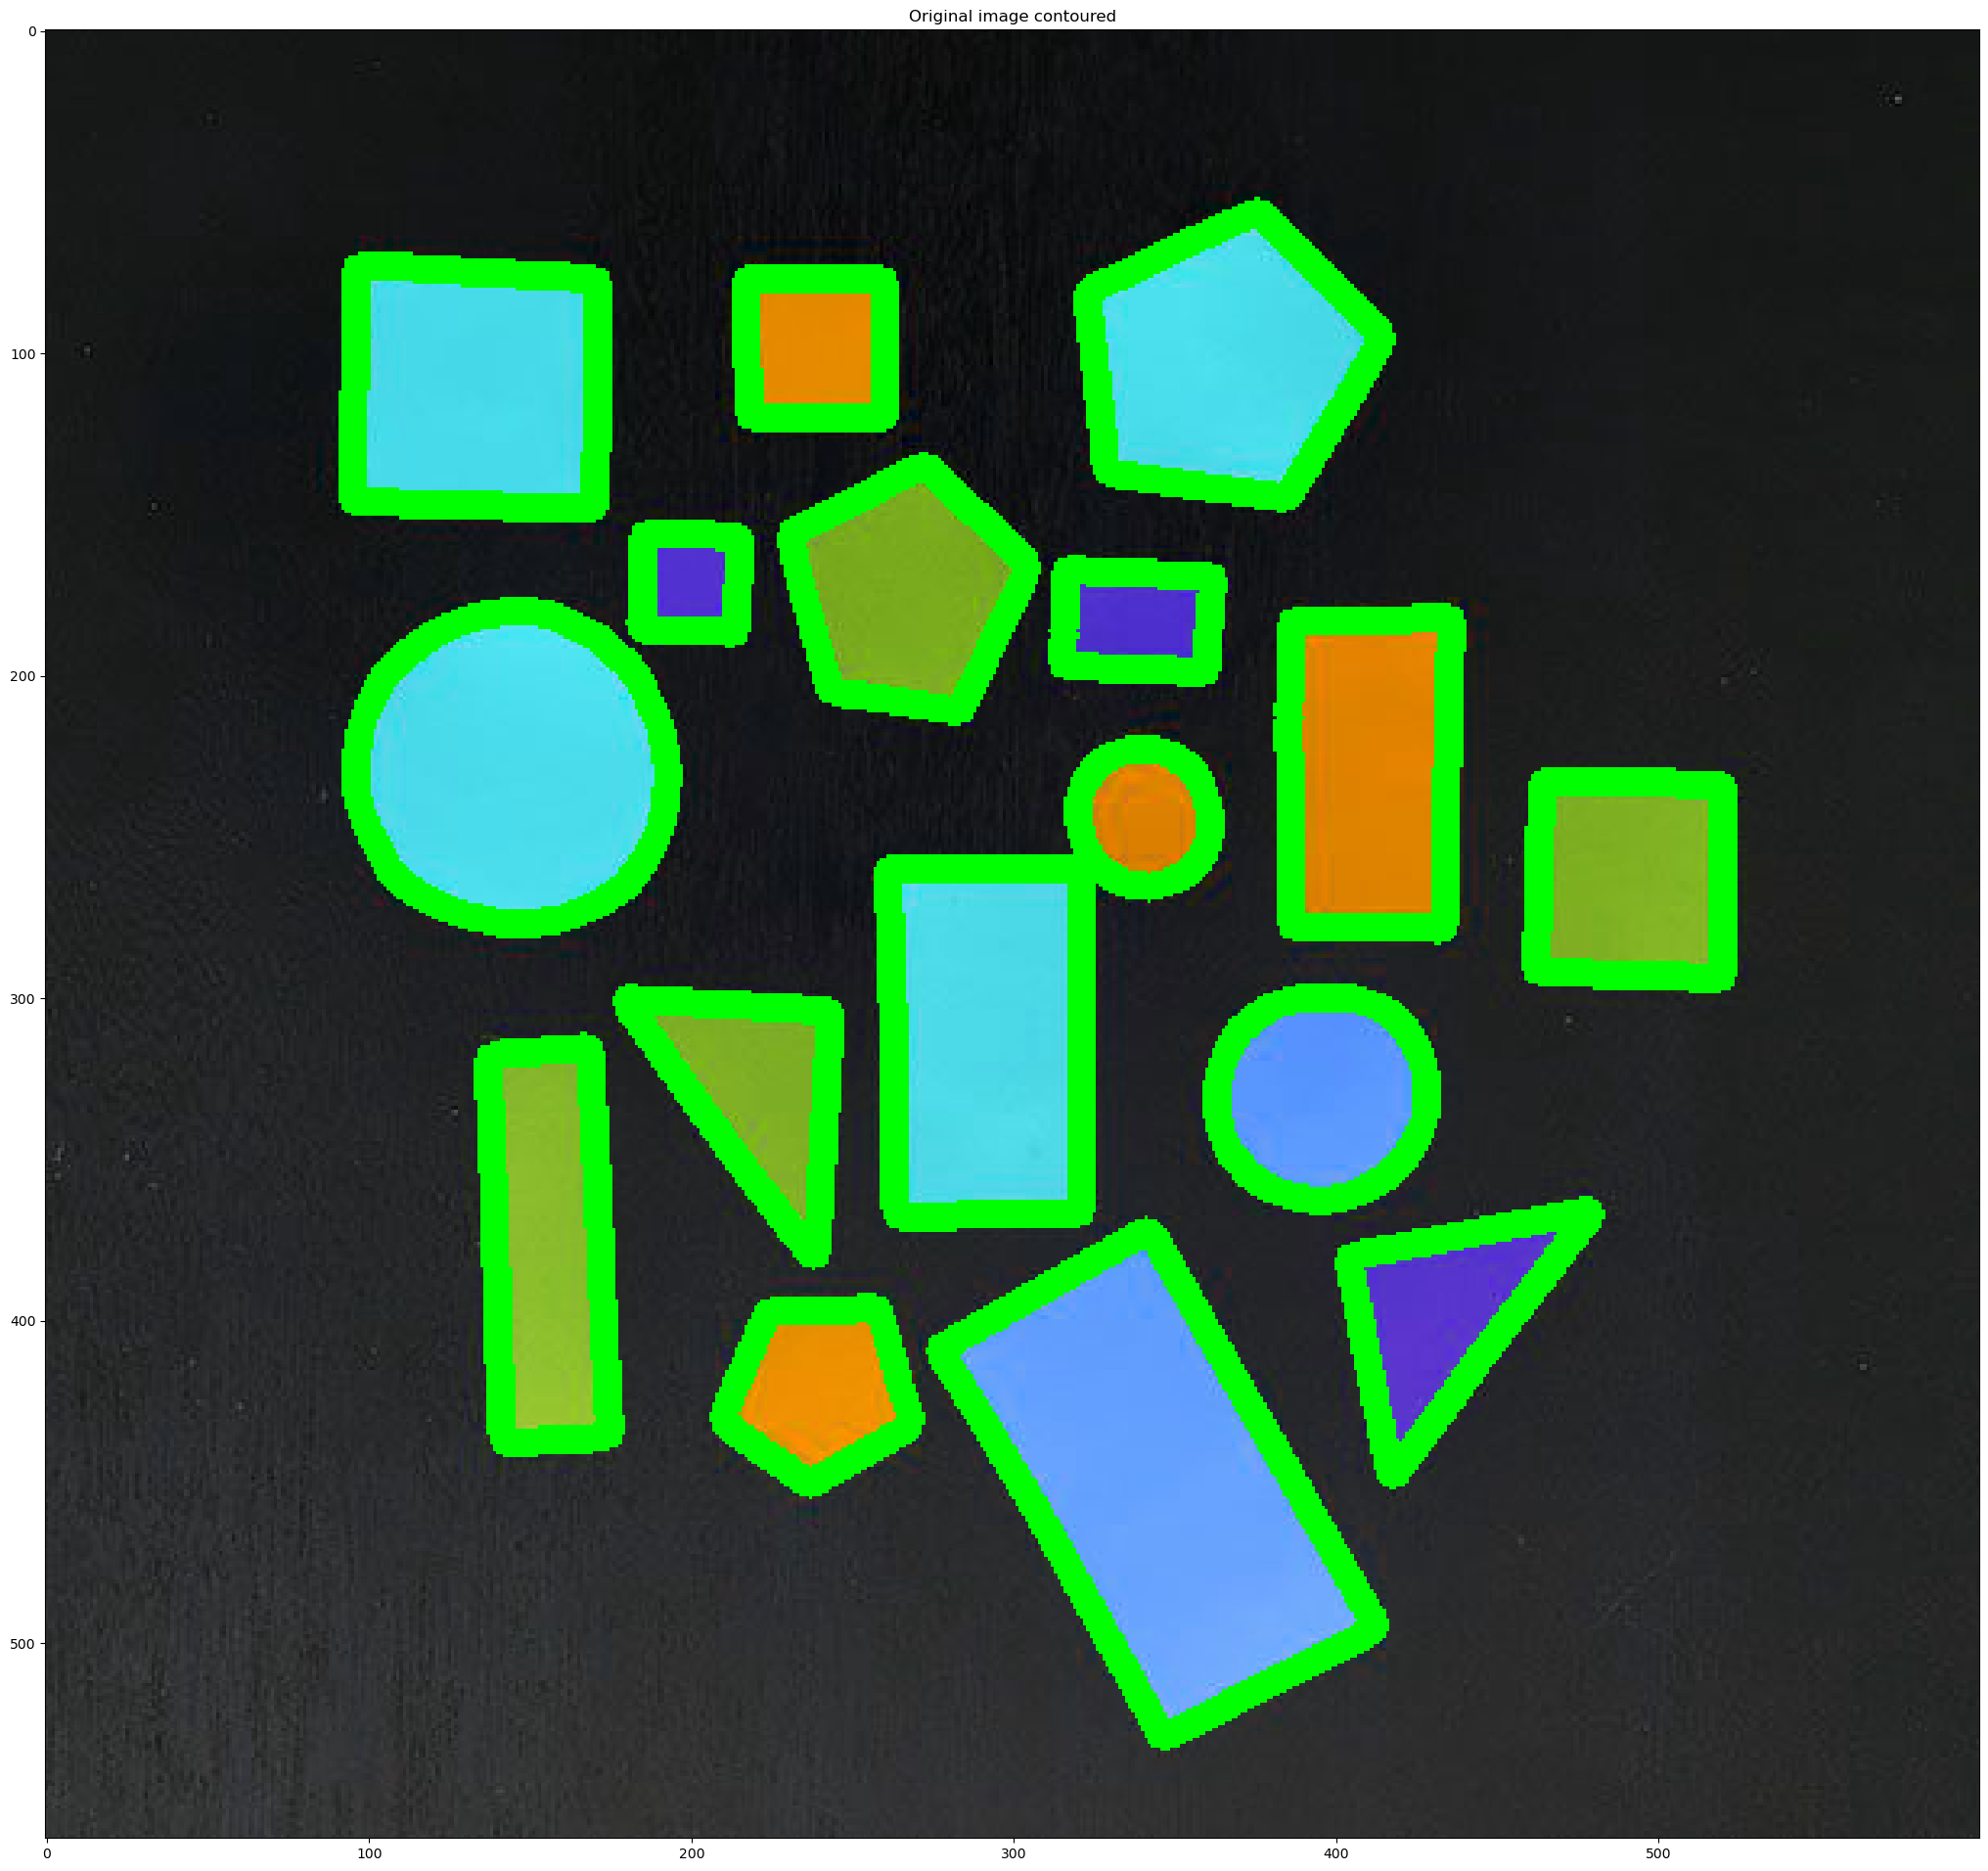

In [68]:
# draw the contour and center of the shape on the image

for contour in cnts:
        area = cv2.contourArea(contour)
        print(area)

def clean_contours_by_area(contours, min_size, max_size, min_circularity):
    """filter all contours by size to prevent noise"""
    filtred_contours  = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if (area < max_size) & (area > min_size):
            perimeter = cv2.arcLength(contour, True)
            filtred_contours.append(contour)
    return filtred_contours

cnts_filtred = clean_contours_by_area(cnts,500,100000,0.5)
cv2.drawContours(image_copy, cnts_filtred, -1, (0, 255, 0), 8)

print('Number of contours found: ',len(cnts_filtred))


# show image
fig, axes = plt.subplots(1, 1, figsize=(48, 24))
axes.imshow(image_copy, cmap='gray', vmin=0, vmax=255)
axes.set_title('Original image contoured')


Now, we will put the center of each polygon and text in the image:

Text(0.5, 1.0, 'Original image contoured')

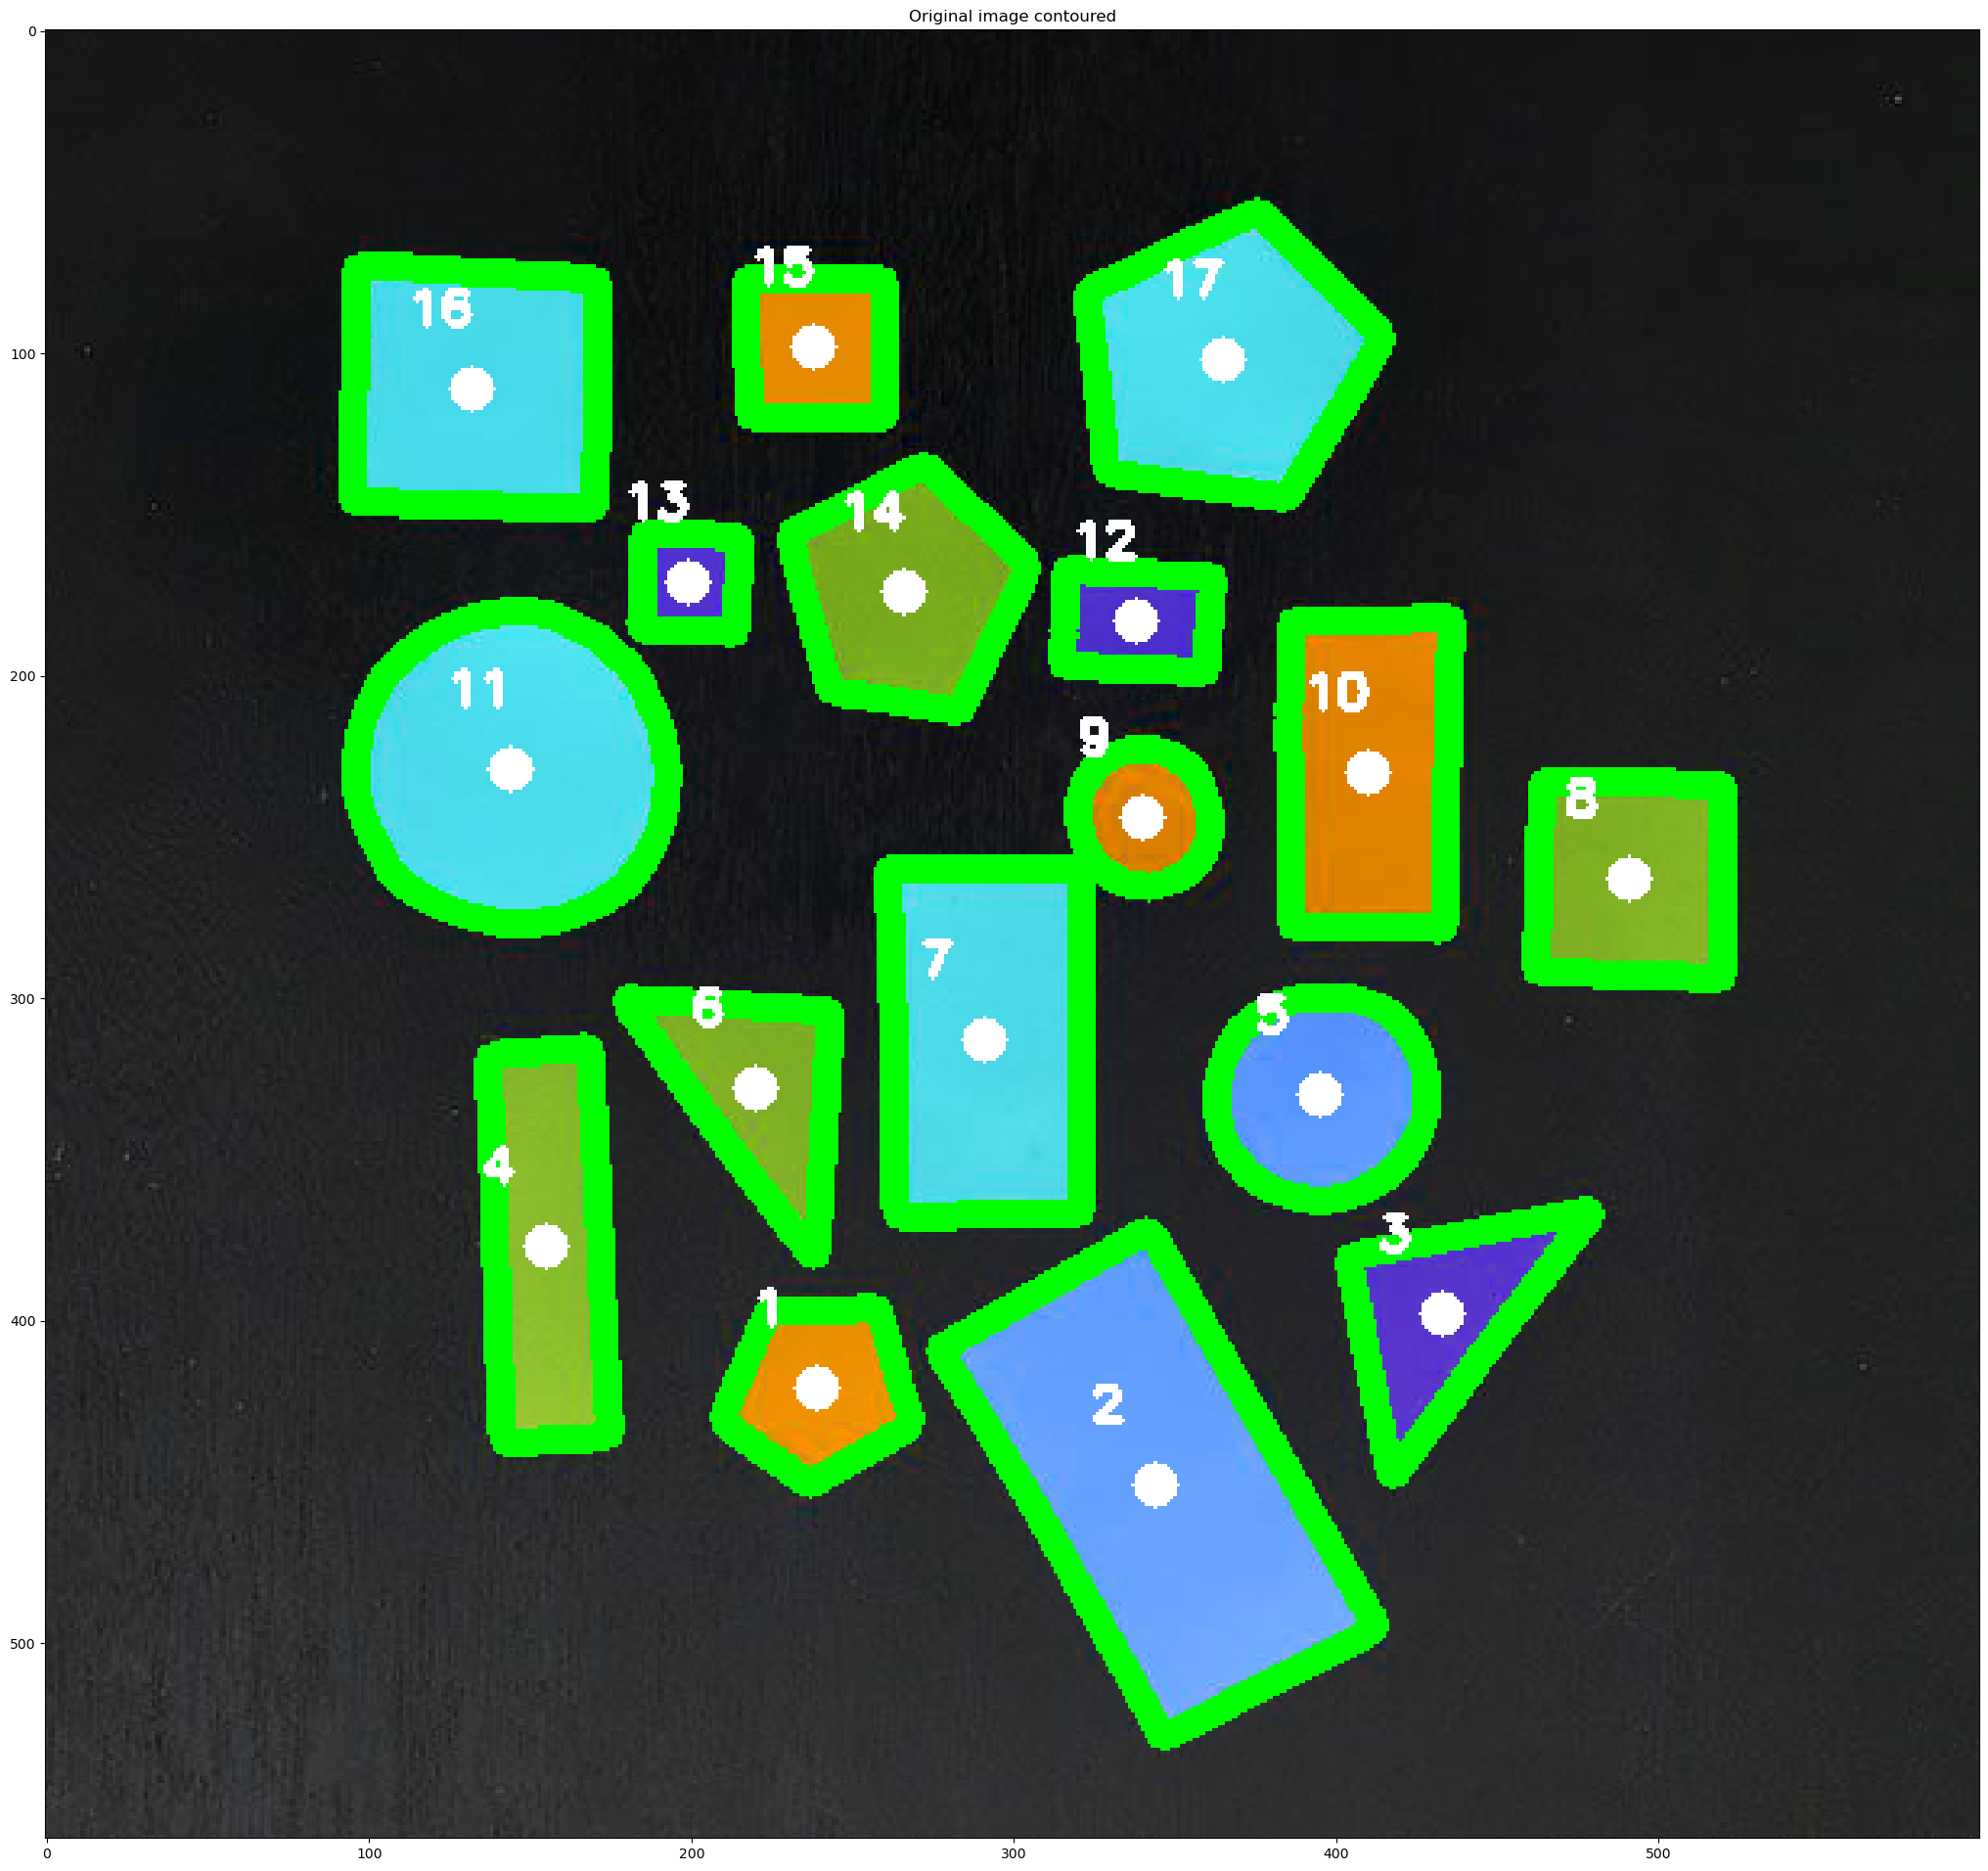

In [69]:
i= 0
for c in cnts_filtred:
    i+=1
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
 
    # draw the contour and center of the shape on the image
    cv2.circle(image_copy, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image_copy, str(i), (cX - 20, cY - 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
    # show the image
    # cv2.imshow("Image", image_copy)
    # cv2.waitKey(0)
    
# show image
fig, axes = plt.subplots(1, 1, figsize=(48, 24))
axes.imshow(image_copy, cmap='gray', vmin=0, vmax=255)
axes.set_title('Original image contoured')


After put

2.0063978275815075
0.33051631953756877
1.0268672826486656
0.7313911809961714
1.5317312211988505
1.1565030997797834
0.6369779395431672
1.2870952064468444
3.5986865605314104
0.8350674439624819
0.6725897107722429
3.032397139877939
4.898177670590439
1.1760468236527508
2.429587510403807
0.8029136348912707
0.7965600262958769


Text(0.5, 1.0, 'Original image contoured')

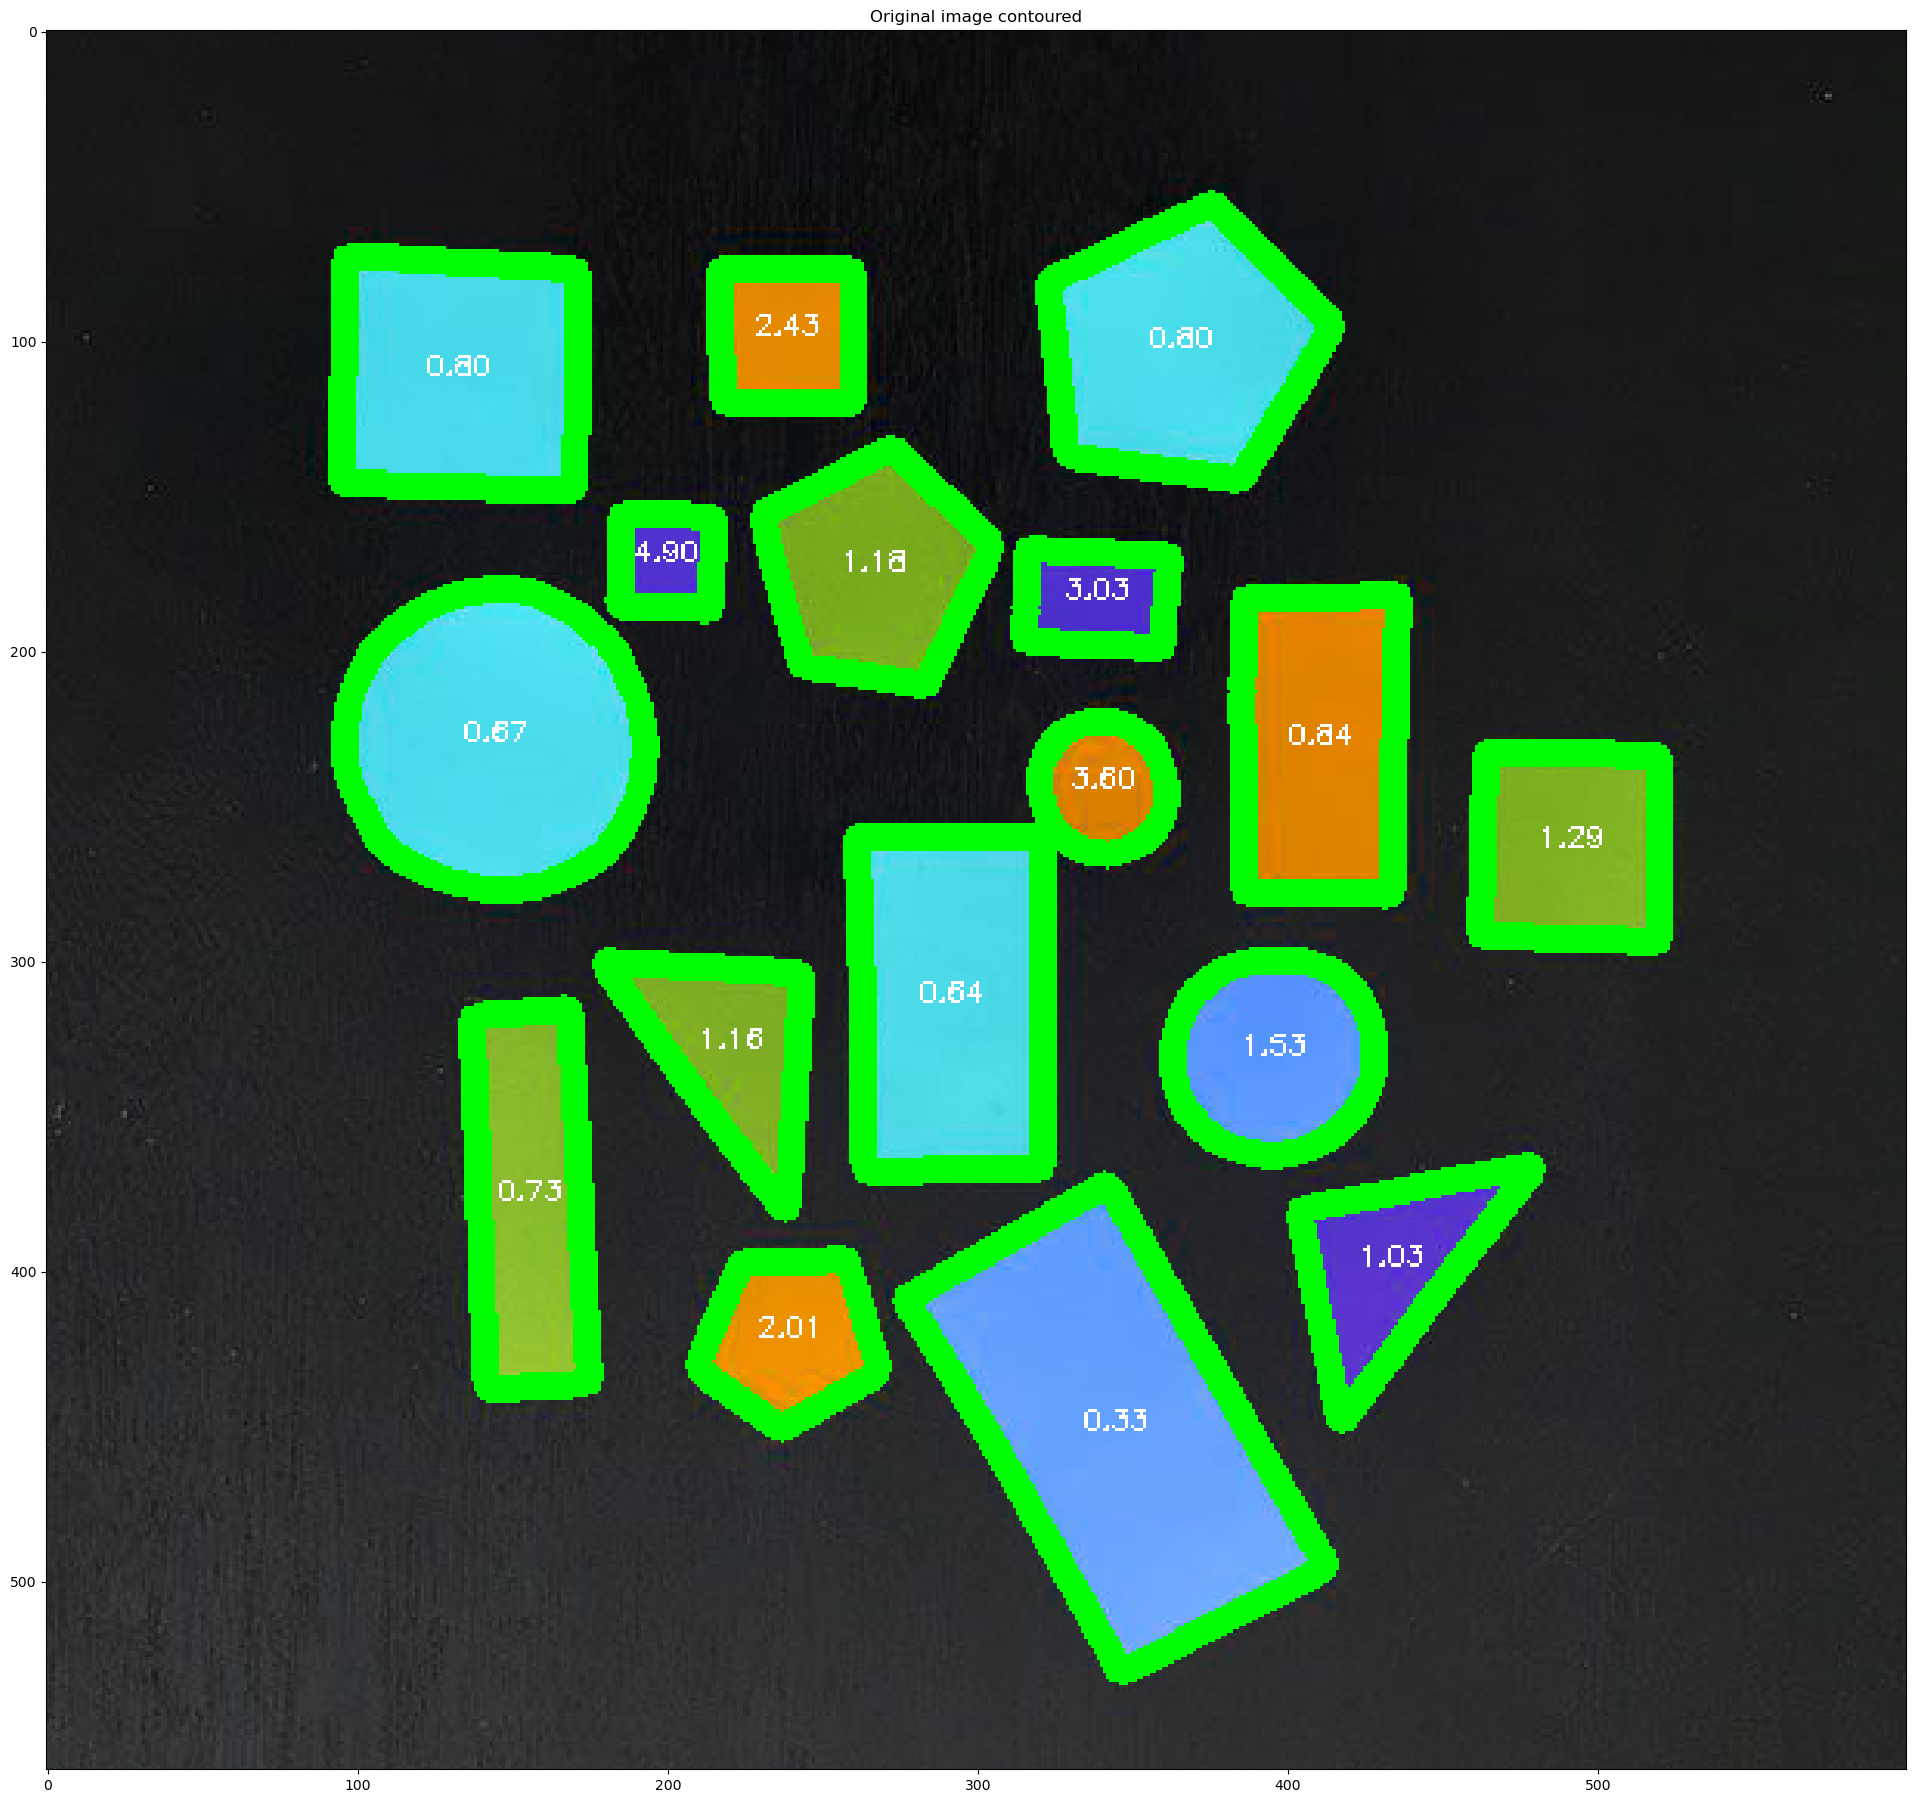

In [70]:
def calc_circularity(area, perimeter):
    return (4 * np.pi * area) / (perimeter * perimeter)

def clean_contours_by_circularity(contours, min_circularity):
    """filter all contours by size and circularity to prevent noise"""
    filtred_contours  = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        circularity = calc_circularity(area, perimeter)
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(circularity)
        if circularity > min_circularity:
            cv2.putText(image_original, str('{:.2f}'.format(circularity)), (cX-10 , cY - 0),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
            filtred_contours.append(contour)
    return filtred_contours

cnts_filtred_circularity = clean_contours_by_circularity(cnts_filtred,0.2)
cv2.drawContours(image_original, cnts_filtred_circularity, -1, (0, 255, 0), 8)

# definimos por forma, circulos, cuadrados, rectangulos, pentagonos, triangulos
# show image

fig, axes = plt.subplots(1, 1, figsize=(24, 24))
axes.imshow(image_original, cmap='gray', vmin=0, vmax=255)
axes.set_title('Original image contoured')


## BIBLIOGRAPHY

* https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/